# Benchmarking LDA in gensim

This is a benchmarking done on gensim by runninng LDA over the 20 newsgroup dataset.
Benchmarking was done on a : i7 system with 2 cores @2.40Ghz 4 threads and 8 Gb RAM.

**Gensim version 0.13.4.1**

In [1]:
import os
from gensim import corpora, models
%load_ext memory_profiler

In [2]:
import scipy
scipy.show_config()

lapack_opt_info:
    libraries = ['openblas']
    library_dirs = ['/usr/local/lib']
    language = f77
blas_opt_info:
    libraries = ['openblas']
    library_dirs = ['/usr/local/lib']
    language = f77
openblas_info:
    libraries = ['openblas']
    library_dirs = ['/usr/local/lib']
    language = f77


In [3]:
MODELS_DIR = "../Data/models/lda_standard"
num_topics = 10
dictionary = corpora.Dictionary.load(os.path.join(MODELS_DIR,'twentyNewsGroup.dict'))
corpus = corpora.MmCorpus(os.path.join(MODELS_DIR, 'corpora.mm'))

## Default settings

First off I will start by testing with default settings

In [4]:
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

1 loop, best of 3: 1min 14s per loop


In [5]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

peak memory: 231.51 MiB, increment: 65.73 MiB


In [6]:
%timeit lda = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers = 1)

1 loop, best of 3: 1min 3s per loop


In [7]:
%timeit lda = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers = 2)

1 loop, best of 3: 53.2 s per loop


In [8]:
%timeit lda = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers = 3)

1 loop, best of 3: 51.7 s per loop


In [9]:
%timeit lda = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers = 4)

1 loop, best of 3: 50.8 s per loop


In [10]:
%memit lda = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers = 1)

peak memory: 462.82 MiB, increment: 198.18 MiB


In [11]:
%memit lda = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers = 2)

peak memory: 416.68 MiB, increment: 127.80 MiB


In [12]:
%memit lda = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers = 3)

peak memory: 465.73 MiB, increment: 195.93 MiB


In [13]:
%memit lda = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers = 4)

peak memory: 502.21 MiB, increment: 92.29 MiB


## Additional parameters

Now to simulate a more useful use-case scenario when performing topic modelling, I will now start putting more parameters and tinkering with them, and see how exection time and memory consumption would vary.

### Iterations

In [14]:
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, iterations = 100)

1 loop, best of 3: 1min 24s per loop


In [15]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, iterations = 100)

peak memory: 469.88 MiB, increment: 0.00 MiB


In [16]:
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, iterations = 300)

1 loop, best of 3: 1min 31s per loop


In [17]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, iterations = 300)

peak memory: 330.81 MiB, increment: 21.08 MiB


In [18]:
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, iterations = 1000)

1 loop, best of 3: 1min 36s per loop


In [19]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, iterations = 1000)

peak memory: 331.52 MiB, increment: 83.15 MiB


Testing LDA with iterations with 3 workers

In [20]:
%timeit lda = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=10, workers = 3, iterations = 100)

1 loop, best of 3: 1min 3s per loop


In [21]:
%memit lda = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=10, workers = 3, iterations = 100)

peak memory: 488.07 MiB, increment: 46.46 MiB


In [22]:
%timeit lda = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=10, workers = 3, iterations = 300)

1 loop, best of 3: 1min 31s per loop


In [23]:
%memit lda = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=10, workers = 3, iterations = 300)

peak memory: 595.02 MiB, increment: 85.02 MiB


In [24]:
%timeit lda = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=10, workers = 3, iterations = 1000)

1 loop, best of 3: 2min 7s per loop


In [25]:
%memit lda = models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=10, workers = 3, iterations = 1000)

peak memory: 542.75 MiB, increment: 145.43 MiB


### Number of topics

In [26]:
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, iterations=100)

1 loop, best of 3: 1min 8s per loop


In [27]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, iterations=100)

peak memory: 448.07 MiB, increment: 18.73 MiB


In [28]:
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20, iterations=100)

1 loop, best of 3: 1min 53s per loop


In [29]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20, iterations=100)

peak memory: 491.55 MiB, increment: 105.94 MiB


In [30]:
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=40, iterations=100)

1 loop, best of 3: 2min 52s per loop


In [31]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=40, iterations=100)

peak memory: 563.61 MiB, increment: 210.35 MiB


In [32]:
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=60, iterations=100)

1 loop, best of 3: 3min 46s per loop


In [33]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=60, iterations=100)

peak memory: 706.84 MiB, increment: 372.53 MiB


In [34]:
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=80, iterations=100)

1 loop, best of 3: 4min 33s per loop


In [35]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=80, iterations=100)

peak memory: 889.00 MiB, increment: 511.99 MiB


### Number of passes

In [36]:
#default number of passes is 1
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=1)

1 loop, best of 3: 57.8 s per loop


In [37]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=1)

peak memory: 425.43 MiB, increment: 13.69 MiB


In [38]:
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=2)

1 loop, best of 3: 1min 38s per loop


In [39]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=2)

peak memory: 282.23 MiB, increment: 12.80 MiB


### Alpha

In [40]:
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, alpha='symmetric', iterations=1000)

1 loop, best of 3: 1min 21s per loop


In [41]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, alpha='symmetric', iterations=1000)

peak memory: 282.17 MiB, increment: 9.50 MiB


In [42]:
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, alpha='asymmetric', iterations=1000)

1 loop, best of 3: 1min 20s per loop


In [43]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, alpha='asymmetric', iterations=1000)

peak memory: 282.42 MiB, increment: 10.49 MiB


In [44]:
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, alpha='auto', iterations=1000)

1 loop, best of 3: 1min 18s per loop


In [45]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, alpha='auto', iterations=1000)

peak memory: 282.47 MiB, increment: 10.04 MiB


### Chunksize

In [46]:
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, chunksize=2000, iterations=1000)

1 loop, best of 3: 1min 21s per loop


In [47]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, chunksize=2000, iterations=1000)

peak memory: 282.43 MiB, increment: 9.25 MiB


In [48]:
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, chunksize=3000, iterations=1000)

1 loop, best of 3: 1min 34s per loop


In [49]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, chunksize=3000, iterations=1000)

peak memory: 294.43 MiB, increment: 18.76 MiB


In [50]:
%timeit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, chunksize=4000, iterations=1000)

1 loop, best of 3: 1min 52s per loop


In [51]:
%memit lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, chunksize=4000, iterations=1000)

peak memory: 305.25 MiB, increment: 31.03 MiB


## Visualization

In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
sns.set(style="white")

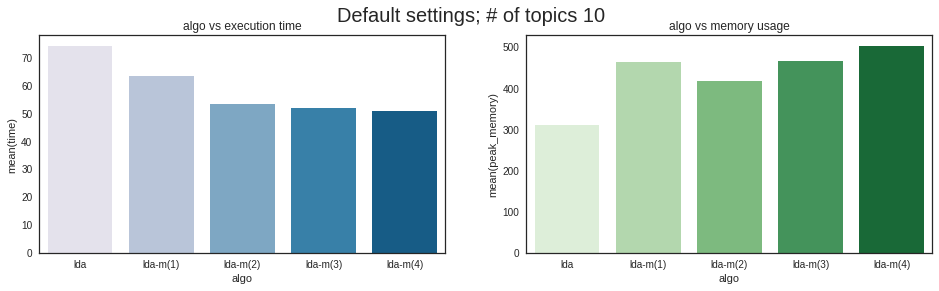

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
d = { 'time' : pd.Series([74, 63, 53.2, 51.7, 50.8], index=xrange(5)),
    'peak_memory' : pd.Series([310.88, 462.82, 416.68, 465.73, 502.21], index=xrange(5)),
     'memory_increment' : pd.Series([65.73, 198.18, 127.80, 195.93, 92.29], index=xrange(5)),
     'algo' : pd.Series(['lda', 'lda-m(1)', 'lda-m(2)', 'lda-m(3)', 'lda-m(4)'], index=xrange(5))}
data = pd.DataFrame(d)
plt.suptitle('Default settings; # of topics 10', fontsize=20)
ax1.set_title('algo vs execution time')
ax1.set_xlabel('Algo')
ax1.set_ylabel('Time in sec')
data = pd.DataFrame(d)
sns.barplot(x='algo', y='time', data=data, palette='PuBu', ax=ax1)
ax2.set_title('algo vs memory usage')
ax2.set_xlabel('Algo')
ax2.set_ylabel('Memory in MB')
sns.barplot(x='algo', y='peak_memory', data=data, palette='Greens', ax=ax2)

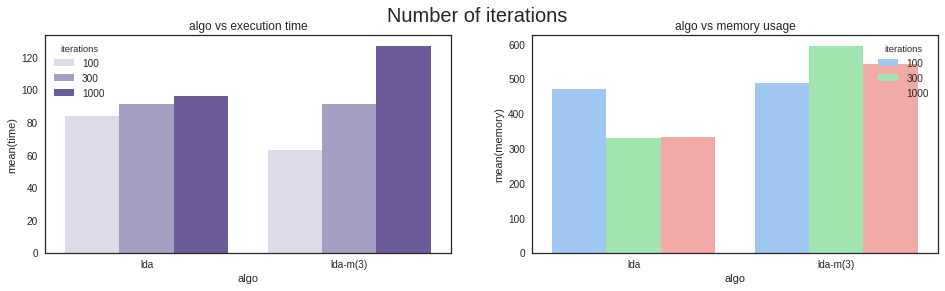

In [54]:
f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
d1 = { 'time' : pd.Series([84, 91, 96, 63, 91, 127], index=xrange(6)),
    'memory' : pd.Series([469.88, 330.81, 331.52, 488.07, 595.02, 542.75], index=xrange(6)),
     'iterations' : pd.Series([100, 300, 1000, 100, 300, 1000], index=xrange(6)),
     'algo' : pd.Series(['lda', 'lda', 'lda', 'lda-m(3)', 'lda-m(3)', 'lda-m(3)'], index=xrange(6))}
data1 = pd.DataFrame(d1)
plt.suptitle('Number of iterations', fontsize=20)
ax1.set_title('algo vs execution time')
ax1.set_xlabel('Algo')
ax1.set_ylabel('Time in sec')
sns.barplot(x='algo', y='time', hue='iterations', data=data1, palette='Purples', ax=ax1)
ax2.set_title('algo vs memory usage')
ax2.set_xlabel('Algo')
ax2.set_ylabel('Memory in MB')
sns.barplot(x='algo', y='memory', hue='iterations', data=data1, palette='pastel', ax=ax2)

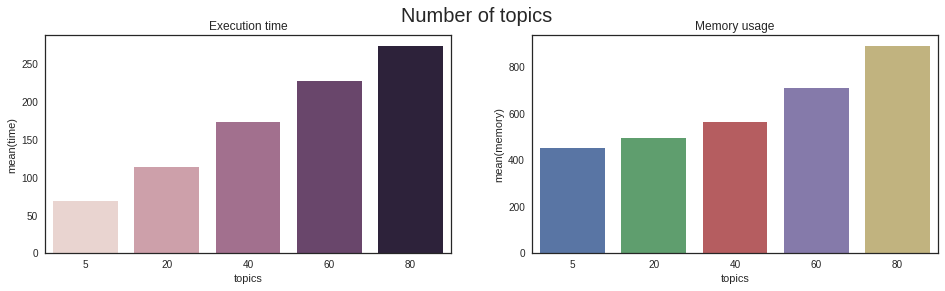

In [55]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
d = { 'time' : pd.Series([68, 113, 172, 226, 273], index=xrange(5)),
    'memory' : pd.Series([448.07, 491.55, 563.61, 706.84, 889.00], index=xrange(5)),
     'topics' : pd.Series([5, 20, 40, 60, 80], index=xrange(5))}
data = pd.DataFrame(d)
plt.suptitle('Number of topics', fontsize=20)
ax1.set_title('Execution time')
ax1.set_xlabel('Algo')
ax1.set_ylabel('Time in sec')
sns.barplot(x='topics', y='time', data=data, palette=sns.cubehelix_palette(5)
, ax=ax1)
ax2.set_title('Memory usage')
ax2.set_xlabel('Algo')
ax2.set_ylabel('Memory in MB')
sns.barplot(x='topics', y='memory', data=data, ax=ax2)

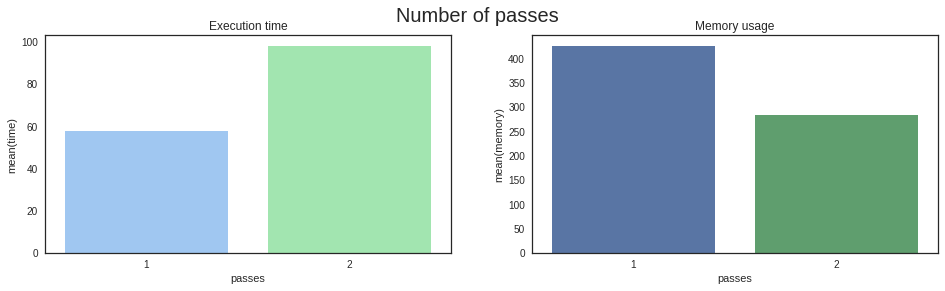

In [56]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
d = { 'time' : pd.Series([57.8, 98], index=xrange(2)),
    'memory' : pd.Series([425.43, 282.23], index=xrange(2)),
     'passes' : pd.Series([1, 2], index=xrange(2))}
data = pd.DataFrame(d)
plt.suptitle('Number of passes', fontsize=20)
ax1.set_title('Execution time')
ax1.set_xlabel('Algo')
ax1.set_ylabel('Time in sec')
sns.barplot(x='passes', y='time', data=data, palette='pastel', ax=ax1)
ax2.set_title('Memory usage')
ax2.set_xlabel('Algo')
ax2.set_ylabel('Memory in MB')
sns.barplot(x='passes', y='memory', data=data, ax=ax2)

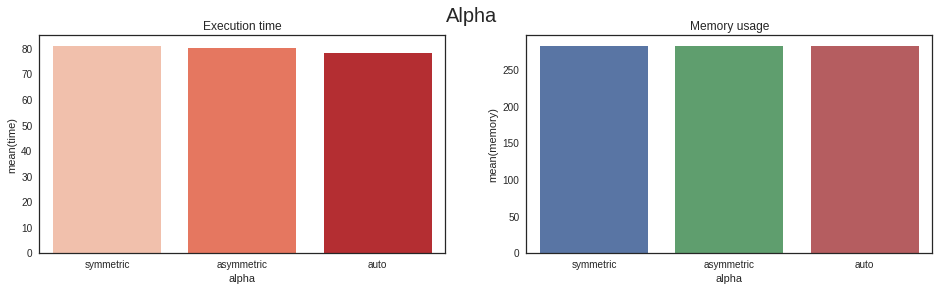

In [57]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
d = { 'time' : pd.Series([81, 80, 78], index=xrange(3)),
    'memory' : pd.Series([282.17, 282.23, 282.47], index=xrange(3)),
     'alpha' : pd.Series(['symmetric', 'asymmetric', 'auto'], index=xrange(3))}
data = pd.DataFrame(d)
plt.suptitle('Alpha', fontsize=20)
ax1.set_title('Execution time')
ax1.set_xlabel('Algo')
ax1.set_ylabel('Time in sec')
sns.barplot(x='alpha', y='time', data=data, palette='Reds', ax=ax1)
ax2.set_title('Memory usage')
ax2.set_xlabel('Algo')
ax2.set_ylabel('Memory in MB')
sns.barplot(x='alpha', y='memory', data=data, ax=ax2)

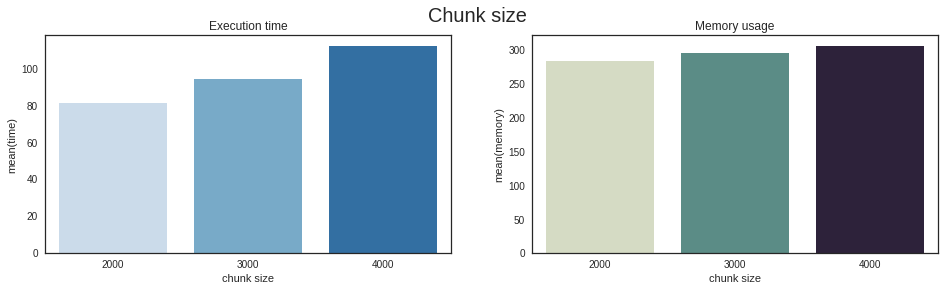

In [58]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
d = { 'time' : pd.Series([81, 94, 112], index=xrange(3)),
    'memory' : pd.Series([282.43, 294.43, 305.25], index=xrange(3)),
     'chunk size' : pd.Series([2000, 3000, 4000], index=xrange(3))}
data = pd.DataFrame(d)
plt.suptitle('Chunk size', fontsize=20)
ax1.set_title('Execution time')
ax1.set_xlabel('Algo')
ax1.set_ylabel('Time in sec')
sns.barplot(x='chunk size', y='time', data=data, palette='Blues', ax=ax1)
ax2.set_title('Memory usage')
ax2.set_xlabel('Algo')
ax2.set_ylabel('Memory in MB')
sns.barplot(x='chunk size', y='memory', data=data, palette=sns.cubehelix_palette(3, start=.5, rot=-.75), ax=ax2)